In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Import libraries** <a class="anchor" id="7"></a>



In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **2. Import dataset** <a class="anchor" id="8"></a>



In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/car_evaluation.csv")

# **3. Exploratory data analysis** <a class="anchor" id="9"></a>



Now, we will explore the data to gain insights about the data.

In [4]:
df.shape

(1727, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. we will do it as follows:-

In [6]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = cols

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, we will check the frequency counts of categorical variables.

In [11]:
for col in cols:
  print(df[col].value_counts())
  print("----------------------")
  print("----------------------")

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
----------------------
----------------------
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
----------------------
----------------------
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
----------------------
----------------------
persons
4       576
more    576
2       575
Name: count, dtype: int64
----------------------
----------------------
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
----------------------
----------------------
safety
med     576
high    576
low     575
Name: count, dtype: int64
----------------------
----------------------
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64
----------------------
----------------------


We can see that the `doors` and `persons` are categorical in nature. So, we will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [13]:
df["class"].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [14]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# **4. Declare feature vector and target variable**


In [95]:
X = df.drop(['class'], axis=1)

y = df['class']

In [53]:
print(X.head())
print("--------")
print(y.head())

  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    med
1  vhigh  vhigh     2       2    small   high
2  vhigh  vhigh     2       2      med    low
3  vhigh  vhigh     2       2      med    med
4  vhigh  vhigh     2       2      med   high
--------
   class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


# **5. Split data into separate training and test set**


In [96]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

# **6. Feature Engineering** <a class="anchor" id="12"></a>



**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. we will carry out feature engineering on different types of variables.


First, we will check the data types of variables again.

In [56]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, we will encode the categorical variables.

In [57]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [97]:
# Categorical columns
cat_cols = ["buying", "maint",	"doors",	"persons",	"lug_boot",	"safety"]

We can see that all  the variables are ordinal categorical data type.

In [98]:
ord_enc = OrdinalEncoder()

X_train[cat_cols] = ord_enc.fit_transform(X_train[cat_cols])
X_test[cat_cols] = ord_enc.transform(X_test[cat_cols])

In [60]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,3.0,0.0,0.0,0.0,2.0,1.0
900,2.0,3.0,1.0,1.0,2.0,2.0
1708,1.0,1.0,3.0,0.0,0.0,0.0
705,0.0,2.0,2.0,0.0,1.0,2.0
678,0.0,2.0,1.0,0.0,1.0,2.0


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


We now have training and test set ready for model building.

# **7. Random Forest Classifier model with default parameters**


In [99]:
# Number of decision-trees
n_est = 10

rfc = RandomForestClassifier(n_estimators=n_est, random_state=0)

# Fit the model
rfc.fit(X_train, y_train)

# Predict test results
y_pred = rfc.predict(X_test)

# Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with {n_est} decision-trees: {accuracy * 100:.2f}%")

Model accuracy score with 10 decision-trees: 93.35%


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, we have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, we have used 10 decision-trees to build the model. Now, we will increase the number of decision-trees and see its effect on accuracy.

# **8. Random Forest Classifier model with parameter n_estimators=100**



In [100]:
# Number of decision-trees
n_est = 100

rfc = RandomForestClassifier(n_estimators=n_est, random_state=0)

# Fit the model
rfc.fit(X_train, y_train)

# Predict test results
y_pred = rfc.predict(X_test)

# Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with {n_est} decision-trees: {accuracy * 100:.2f}%")

Model accuracy score with 100 decision-trees: 95.95%


The model accuracy score with 10 decision-trees is 93.35% but the same with 100 decision-trees is 95.95%. So, as expected accuracy increases with number of decision-trees in the model.

# **9. Find important features with Random Forest model**

Until now, we have used all the features given in the model. Now, we will select only the important features, build the model using these features and see its effect on accuracy.


First, we will create the Random Forest model as follows:-

Now, we will use the feature importance variable to see feature importance scores.

In [101]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.281243
persons     0.227353
buying      0.204051
maint       0.139813
lug_boot    0.082070
doors       0.065471
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

# **10. Visualize feature scores of the features**


Now, we will visualize the feature scores with matplotlib and seaborn.

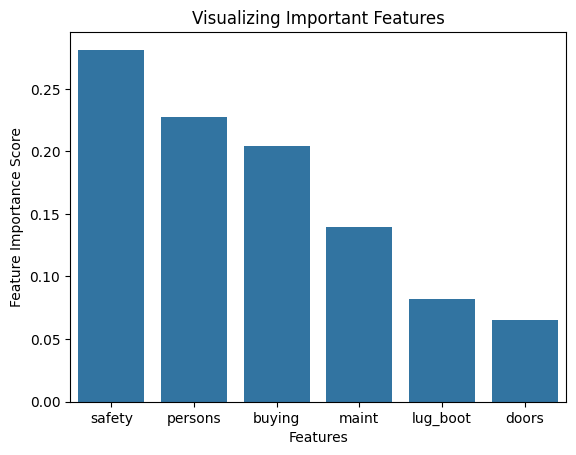

In [102]:
sns.barplot(feature_scores)

# Add labels to the graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')

# Add title to the graph
plt.title("Visualizing Important Features")

plt.show()

# **11. Build Random Forest model on selected features**


Now, we will drop the least important feature `doors` from the model, rebuild the model and check its effect on accuracy.

In [103]:
X = df.drop(columns=["class", "doors"], axis=1)

y = df['class']

Now, we will build the random forest model and check accuracy.

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [105]:
ord_enc = OrdinalEncoder()

cat_cols = ['buying', 'maint', 'persons', 'lug_boot', 'safety']

X_train[cat_cols] = ord_enc.fit_transform(X_train[cat_cols])
X_test[cat_cols] = ord_enc.transform(X_test[cat_cols])

In [115]:
n_est = 100

rfc = RandomForestClassifier(n_estimators=n_est, random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Without 'doors' feature")
print(f"Model accuracy score with {n_est} decision-trees: {accuracy * 100:.2f}%")


Without 'doors' feature
Model accuracy score with 100 decision-trees: 93.06%


we have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 93.06%. The accuracy of the model with all the variables taken into account is 95.95%. So, we can see that the model accuracy has not been improved with `doors` variable removed from the model.


Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

# **12. Confusion matrix**




A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [112]:
print("Confusion matrix:")
confusion_matrix(y_test, y_pred)

Confusion matrix:


array([[ 67,   4,   4,   2],
       [  0,  10,   0,   5],
       [  4,   0, 233,   0],
       [  4,   1,   0,  12]])

# **13. Classification Report**


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [114]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.89      0.87      0.88        77
        good       0.67      0.67      0.67        15
       unacc       0.98      0.98      0.98       237
       vgood       0.63      0.71      0.67        17

    accuracy                           0.93       346
   macro avg       0.79      0.81      0.80       346
weighted avg       0.93      0.93      0.93       346



# **14. Results and conclusion**
- In this notebook, we used random forest classifier with different number of decision tree, 10 and 100.

- 100 decision tree has higher accuracy than 10, 95.95% > 93.35%

- We saw what features have high level of importance and what are not
- `doors` feature got the lowest score of importance, which led us to drop it and rebuild the model without this feature

- We rebuilt the model without `doors` and got a lower result compared to when we kept it.
- Model accuracy without `doors` feature got 93.06%, which is lower than when we kept it (95.95%)